In [32]:
import  pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [33]:
import requests
from io import StringIO

In [34]:
url = "http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv"
url2 = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source = requests.get(url).text

# StirngIOで変換することによって、テキストファイルに対してread_csvが適用可能になる
poll_data = StringIO(source)
poll_df = pd.read_csv(poll_data)

In [35]:
#データの概要を眺める
import pandas_profiling as pdp

pdp.ProfileReport(poll_df)

Number of variables,17
Number of observations,1522
Total Missing (%),7.2%
Total size in memory,202.2 KiB
Average record size in memory,136.1 B
Numeric,5
Categorical,11
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [36]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


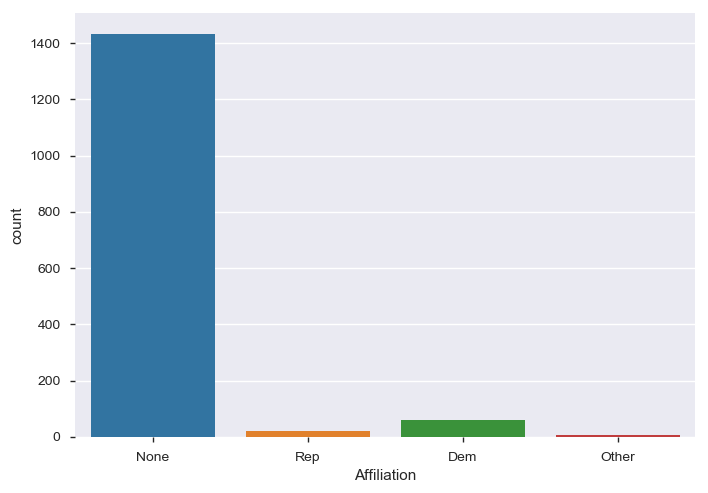

In [37]:
# 各メディアの支持政党で分類する
sns.countplot("Affiliation", data=poll_df)

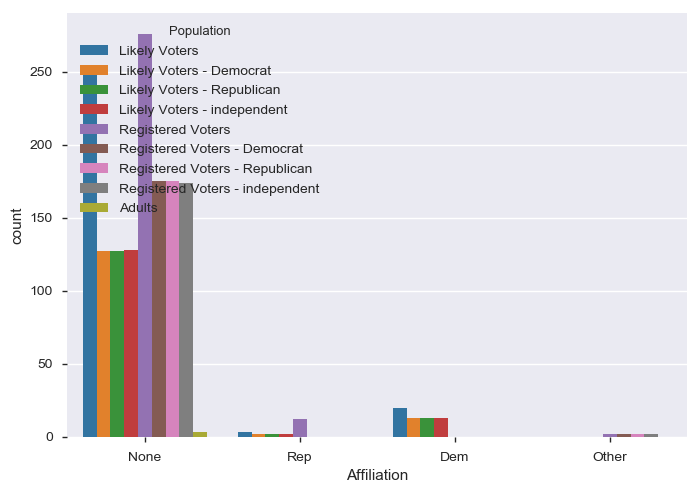

In [38]:
sns.countplot("Affiliation", data=poll_df, hue="Population")

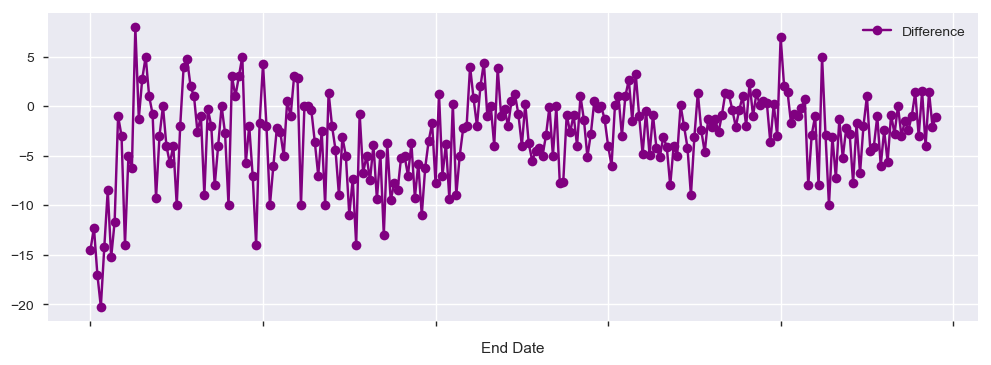

In [39]:
#日時ごとに、両者の支持率の変化をプロット
# 両者の差額を新しいコラムに記入
poll_df["Difference"] = (poll_df.Trump - poll_df.Clinton)

# 同じ日にちに集計が行われたやつはまとめて平均化
poll_df = poll_df.groupby(["End Date"],as_index=False).mean()

fig = poll_df.plot("End Date", "Difference", figsize=(12, 4), marker="o", linestyle="-", color="purple")

In [44]:
#討論会後の支持率の変化を分析
# 日付は、9/26, 10/9, 10/19

poll_df_09 = poll_df[poll_df["End Date"].apply(lambda x:x.startswith("2016-09"))]
poll_df_10 = poll_df[poll_df["End Date"].apply(lambda x:x.startswith("2016-10"))]

poll_df_0910 = pd.concat([poll_df_09, poll_df_10])

poll_df_0910

,End Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
185,2016-09-01,460.941176,42.352941,41.176471,3.705882,6.647059,1.470588,1.176471
186,2016-09-02,1000.750000,38.625000,39.000000,4.250000,15.875000,1.500000,-0.375000
187,2016-09-04,8553.500000,42.636364,44.727273,3.100000,3.400000,1.090909,-2.090909
188,2016-09-05,1084.000000,36.625000,37.000000,10.750000,10.375000,1.500000,-0.375000
189,2016-09-06,538.500000,39.750000,38.750000,6.250000,8.250000,1.000000,1.000000
190,2016-09-07,1000.000000,40.000000,42.000000,3.250000,5.500000,1.000000,-2.000000
191,2016-09-08,863.777778,42.777778,40.444444,2.800000,10.111111,1.444444,2.333333
192,2016-09-11,11233.333333,44.333333,45.333333,4.500000,5.500000,1.333333,-1.000000
193,2016-09-12,2065.000000,38.888889,37.555556,8.555556,9.777778,1.444444,1.333333
194,2016-09-13,884.444444,42.708333,42.625000,4.416667,4.458333,1.333333,0.083333


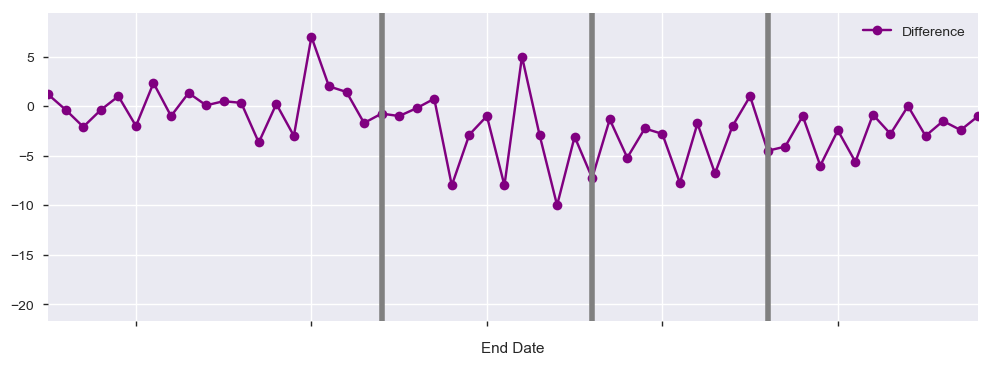

In [47]:
fig = poll_df.plot("End Date", "Difference", figsize=(12,4), marker="o", linestyle="-", color="purple", xlim=(185,238))

plt.axvline(x=204, linewidth=4, color="grey")
plt.axvline(x=216, linewidth=4, color="grey")
plt.axvline(x=226, linewidth=4, color="grey")

# 討論会後はTrumpが優勢になりやすい（特に最後）

In [49]:
# 寄付データを分析（2012年次のもの）
donor_df = pd.read_csv("../Election_Donor_Data.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


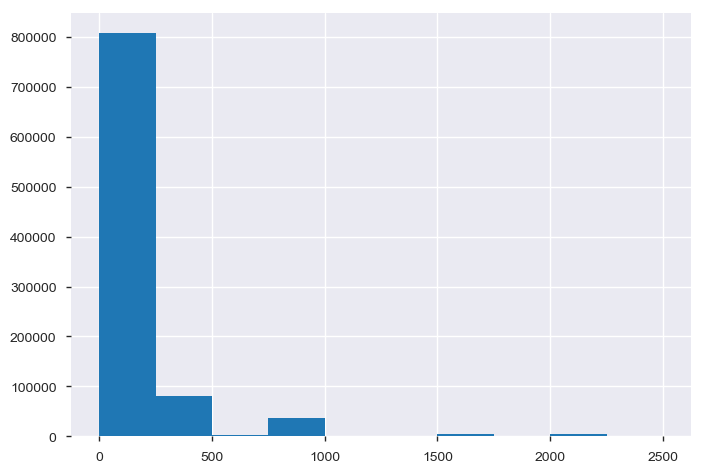

In [51]:
#負の数（払い戻し）を取り除く
top_donor = donor_df["contb_receipt_amt"]
top_donor = top_donor[top_donor > 0]

# 2500ドル以上の寄付を取り除く
com_don = top_donor[top_donor < 2500]

com_don.hist()

In [52]:
#　寄付者の職業と政党の関係を分析

In [53]:
# 重複の無い候補者のデータ
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [54]:
# 所属政党の辞書です。
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# 以下のコードで、DataFrame全体を更新できます。
donor_df['Party'] = donor_df.cand_nm.map(party_map)

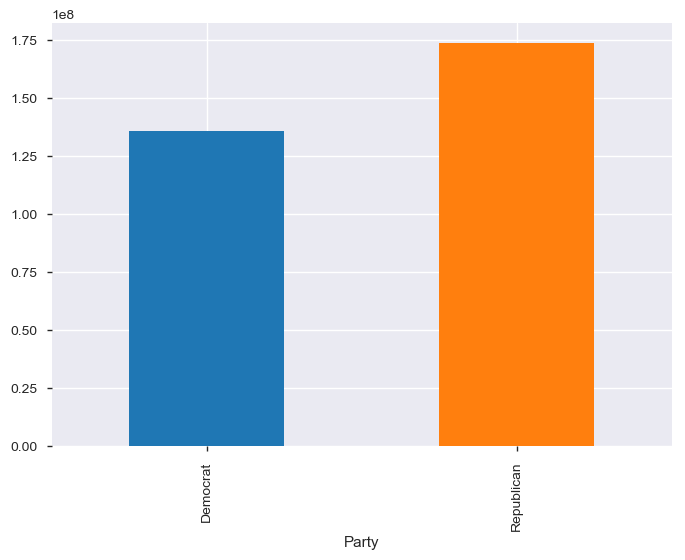

In [55]:
# 払い戻しの除去
donor_df = donor_df[donor_df.contb_receipt_amt >0]

donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [58]:
#職種ごとに、分類
occupation_df = donor_df.pivot_table('contb_receipt_amt', 
                                     index='contbr_occupation',
                                    columns='Party', aggfunc='sum')

In [59]:
occupation_df.head(10)

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.6
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.0
(RETIRED),NaN,250.0
-,5000.0,2114.8


In [61]:
occupation_df.shape

(45067, 2)

In [62]:
# 百万ドル（約1億2千万）をひとつの区切りにする
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

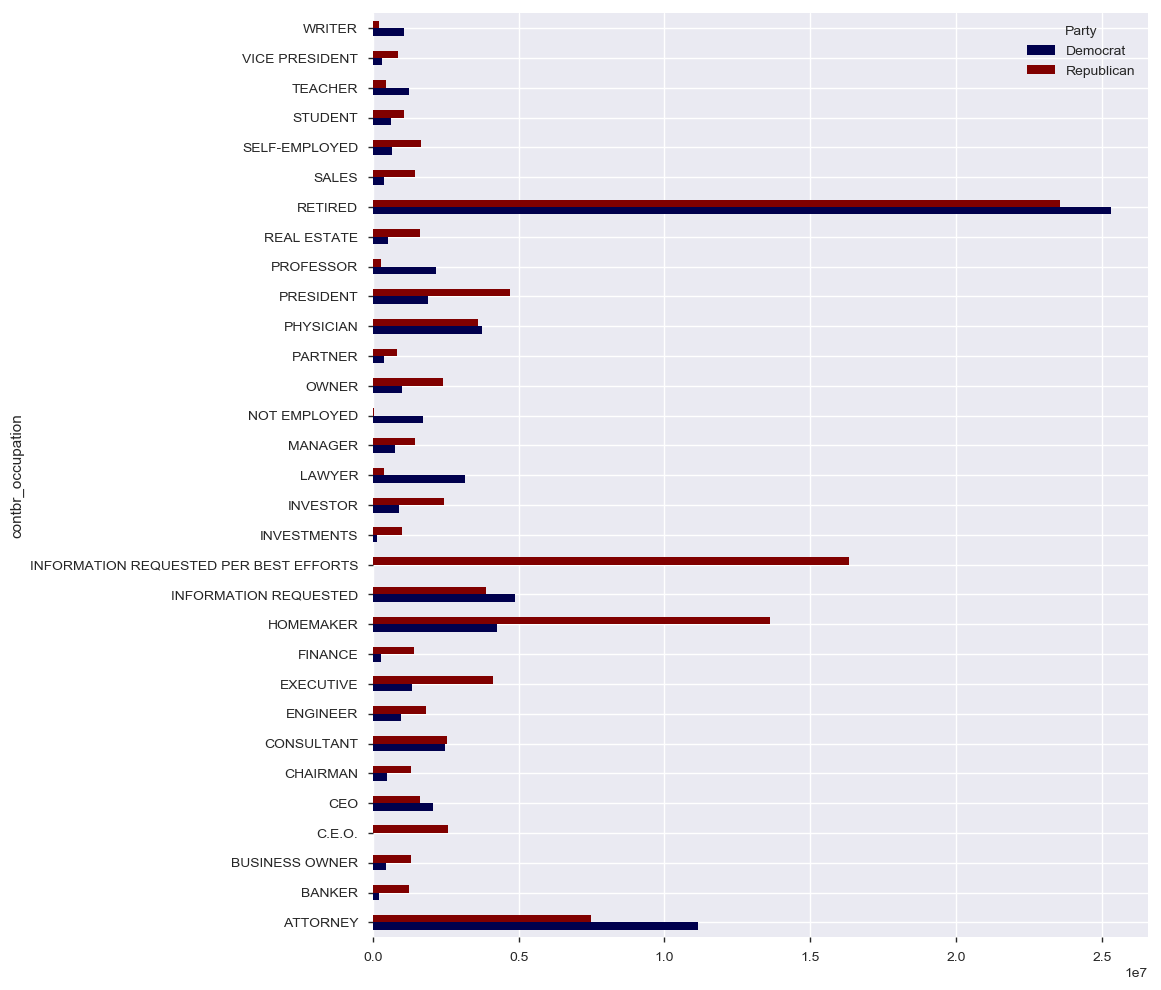

In [63]:
# 横向き（barh）にグラフをプロット
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

In [64]:
# Information requestedらを削除
occupation_df.drop(["INFORMATION REQUESTED PER BEST EFFORTS","INFORMATION REQUESTED"], axis=0, inplace=True)

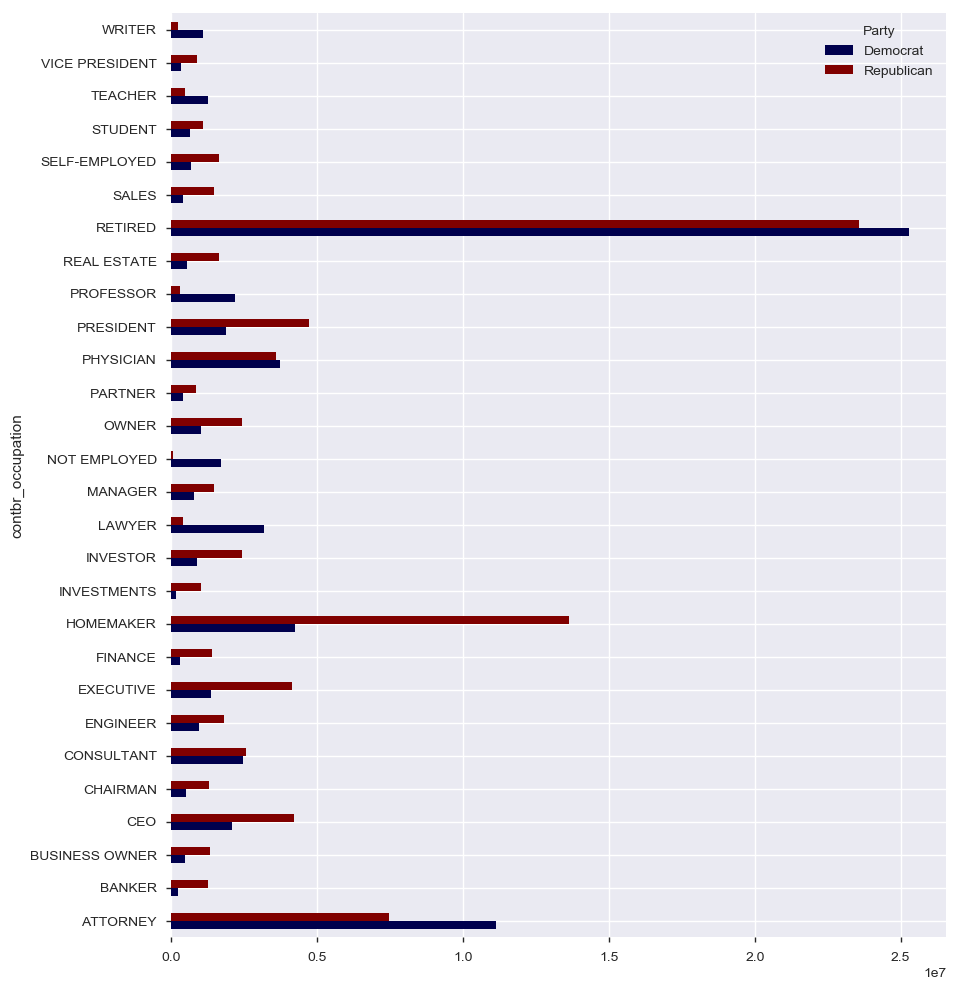

In [66]:
# CEOとC.E.Oをまとめる
occupation_df.loc["CEO"] = occupation_df.loc["CEO"] + occupation_df.loc["C.E.O."]
occupation_df.drop("C.E.O.", inplace=True)

occupation_df.plot(kind="barh", figsize=(10,12),cmap="seismic")